In [3]:
#:
import babypandas as bpd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

# Lecture 13

## Sampling

##### Rolling Dice

- What is the probability of getting more than 40 5's and 6's if I roll 100 dice?
- Approximation through simulation:
    1. Figure out how to do one experiment (i.e., roll 100 dice).
    2. Run the experiment a bunch of times.
    3. Find the fraction of times where number of 5's and 6's >= 40.

## Running the experiment once...

- Use `np.random.choice` to roll 100 dice
- Use `np.count_nonzero` to count number of 5's and 6's.
    - Counts number of entries which are `True`.

In [6]:
dice = np.random.choice([1,2,3,4,5,6], 100)
dice

array([4, 6, 2, 3, 6, 1, 6, 4, 4, 2, 2, 1, 4, 1, 4, 3, 3, 3, 5, 4, 2, 2,
       3, 5, 6, 4, 1, 2, 6, 3, 6, 2, 3, 4, 4, 3, 5, 2, 6, 1, 6, 3, 2, 4,
       6, 6, 4, 6, 1, 5, 3, 3, 2, 3, 6, 3, 3, 4, 5, 3, 2, 3, 1, 2, 6, 1,
       1, 5, 3, 1, 1, 6, 5, 3, 2, 2, 6, 1, 1, 2, 4, 5, 2, 4, 4, 1, 6, 2,
       5, 6, 2, 2, 2, 2, 1, 1, 1, 2, 3, 4])

In [39]:
dice >= 5

array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False])

## Put it into a function

Make it easier to run the experiment again.

In [21]:
def dice_experiment():
    dice = np.random.choice([1,2,3,4,5,6], 100)
    return np.count_nonzero(dice >= 5)

In [22]:
dice_experiment()

34

## Repeating the experiment

- We can repeat this process many times by using a `for`-loop
- Need to store the results in an array... use `np.append`!

In [34]:
# make head_counts array
n_repetitions = 10000

high_roll_counts = np.array([])

for i in np.arange(n_repetitions):
    high_roll_count = dice_experiment()
    high_roll_counts = np.append(high_roll_counts, high_roll_count)

In [40]:
# in how many trials was the number of high rolls >= 40?
at_least_50 = np.count_nonzero(high_roll_counts >= 40)
at_least_50

960

In [41]:
# what is this as a proportion?
at_least_50 / n_repetitions

0.096

## Visualizing the distribution

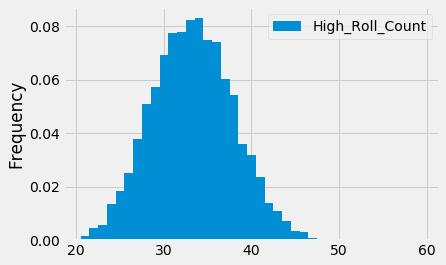

In [42]:
#: visualize distribution of trial results
bpd.DataFrame().assign(
    High_Roll_Count=high_roll_counts
).plot(kind='hist', bins=np.arange(20.5,60), density=True)
# plt.axvline(60, color='C1')

# Simulation Summary

1. Make a function that runs the experiment once.
2. Run that function a bunch of times with a `for`-loop, save results in an array with `np.append`.
3. Count how many times an outcome occurs with `np.count_nonzero`.

# Sampling

- What do people think of the new Star Wars movie?
- We can't ask *everyone* in the **population** at large.
- So we take a **sample**.
- Central question: what does the opinion of the sample say about the population.

## Population and Sample

- The **population** is the set of things being **sampled** from.
- Examples: all moviegoers, the faces of a die.

## Types of sample

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Involves chance
* Before the sample is drawn, you can calculate the probability of selecting each subset of the **population**
* Not all individuals need to have an equal chance of being selected

### Example: deterministic sample

Sample of students: take 50% of students, alphabetically by last name

### Example: probability sample

Sample of students: flip a coin for each student in class (heads, keep; tails, leave)

### Example: a probability sample
* Population: 3 individuals (A, B, C)
* Select a sample of 2
    - A chosen with probability 1
    - Choose B or C based on coin toss
* Possible samples: AB, AC, BC
    - Chance of AB: ½
    - Chance of AC: ½
    - Chance of BC = 0

## Example: movies

In [ ]:
top = bpd.read_csv('top_movies.csv').set_index('Title')
top

### Example: deterministic or probabilistic sample?
* a sample of 3 specific rows

In [ ]:
top.take([3,5,8])

### Example: deterministic or probabilistic sample?
* a sample via a selection

In [ ]:
top[top.index.str.contains('and the')]

### Discussion question
Is the following sampling scheme a deterministic or probabilistic sample?
* Start with a random number; take every tenth row thereafter.

|Option|Answer|
|---|---|
|A| Deterministic|
|B| Probabilitstic|

###  Answer
* Start with a random number; take every tenth row thereafter.
* Any given row is equally likely to be picked! (But not true for groups of rows!)

In [ ]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

### Example: samples uniformly at random with(out) replacement
* `.sample()` method
* `replace=False` is default.

In [ ]:
# without replacement
top.sample(5)

In [ ]:
# with replacement
top.sample(5, replace=True)

## Sample of Convenience
* Example: sample consists of whoever walks by
    - Just because you think you’re sampling “at random”, doesn’t mean you are.
* If you can’t (in principle) figure out ahead of time 
    * what’s the population
    * what’s the chance of selection, for each group in the population
- then you don’t have a random sample!

### Examples: sample of convenience

* Voluntary internet surveys
* Interviewing people on Library Walk
* The first 100 visits to a website after an email campaign begins.

### Samples of convenience: pros and cons
* Pros: 
    - Easy and inexpensive
    - Most common type of sample
* Cons: 
    - Results won't generalize to the population as a whole
    - Results are likely biased

### Example: sample of convenience

* Study: determine the average age and sex of gamblers at a casino 
* Methodology: conducted for three hours on a weekday afternoon 
* Bias: Might overrepresent elderly people who have retired and underrepresented by people of working age

# Distributions

## Probability Distribution
* Random quantity with various possible values
* Example: what we see when we roll a die.
* “Probability distribution”:
    - All the possible values of the quantity
    - The probability of each of those values

## Example: probability distribution of die roll

- Distribution is **uniform**.

In [ ]:
die =  (
    bpd.DataFrame()
    .assign(face=np.arange(1, 7, 1))
)
die

In [ ]:
bins =  np.arange(0.5, 6.6, 1)
die.plot(kind='hist', y='face', bins=bins, density=True)

## Empirical Distribution

* Based on observations
* Observations can be from repetitions of an experiment
* “Empirical Distribution”
    - All observed values
    - The proportion of counts of each value

### Example: Dice
* Simulate a roll as a sample from a table
* Rolling a die = sampling with replacement.

In [ ]:
n = 10

In [ ]:
die.sample(n=n, replace=True).plot(kind='hist', y='face', bins=bins, density=True)

# Large Random Samples

## Law of Averages

If a chance experiment is repeated 
    - many times,
    - independently,
    - under the same conditions,
    
then the proportion of times that an event occurs gets closer to the theoretical probability of the event.


Example: As you roll a die repeatedly, the proportion of times you roll a 5 gets closer to 1/6.

## Large Random Samples

If the sample size is large, then the empirical distribution of a uniform random sample matches the true distribution, with "high probability".

### Example: distribution of flight delays

* All United flights leaving SFO between 6/1/15 and 8/9/15.

In [ ]:
united_full = bpd.read_csv('united_summer2015.csv')
united_full

## Only need delays...

In [ ]:
united = united_full.get(['Delay'])
united

### Empirical distribution of flight delays

* Suppose we could only record delays for a few flights.
* We will sample from the population of all United flights.

In [ ]:
# population distribution
bins = np.arange(-20, 300, 10)
united.plot(kind='hist', y='Delay', bins=bins, density=True)

In [ ]:
# empirical distribution
N = 10**2
united.sample(N, replace=True).plot(kind='hist', y='Delay', bins=bins, density=True)

### Average Flight Delay

- What is the average delay of United out of SFO?
- We'd love to know the average delay of **population**, but we only have a **sample**.
- How does the mean of the **sample** compare to the mean of the **population**?

## Mean of the Population

In [ ]:
# calculate the mean
united_mean = united.get('Delay').mean()
united_mean

## Mean of the Large Random Sample

- This is called the **sample mean**.
- Because the sample is random, the **sample mean** is too!

In [ ]:
united.sample(100).get('Delay').mean()

## Mean of the Large Random Sample

- As the sample gets bigger, the mean gets closer to the mean of the population.

In [ ]:
# the mean of a lot of samples
for n in np.arange(100, 10000, 200):
    m = united.sample(int(n)).get('Delay').mean()
    print('size of sample: ', n, '\t', 'mean of sample: ', m)

## How good is the **sample mean**?

- Is it close to the population mean?
- If the sample is small, high chance that sample mean is bad.
- If the sample is big, small chance that sample mean is bad.


## Small Random Sample

<img src="bullseye-high.png">

## Big Random Sample

<img src="bullseye-low.png">

### Distribution of sample means

- Repeatedly draw a bunch of samples.
- Record the mean of each & visualize.
- Try different sample sizes.

In [ ]:
n_experiments = 2000
means = np.array([])
for n in np.arange(n_experiments):
    m = united.sample(1000, replace=True).get('Delay').mean()
    means = np.append(m, means)

bpd.DataFrame().assign(means=means).plot(kind='hist', bins=np.arange(0,40,.5), density=True)
plt.axvline(x=united_mean, c='r');

### Distribution of means from uniform samples of flights from Denver
* This sample is a probability sample.
* Estimation of the mean is highly biased!

In [ ]:
n_experiments = 10000
means = np.array([])

den = united_full[united_full.get('Destination') == 'DEN'].get(['Delay'])
for n in np.arange(n_experiments):
    m = den.sample(100, replace=True).get('Delay').mean()
    means = np.append(m, means)

bpd.DataFrame().assign(means=means).plot(kind='hist', bins=np.arange(0,40,.5), density=True)
plt.axvline(x=united_mean, c='r');

### Distribution of means from evenly-spaced random samples
* This sample is a probability sample.
* Why does the histogram look this way?

In [ ]:
n_experiments = 2000
means = np.array([])
for n in np.arange(n_experiments):
    start = np.random.choice(np.arange(20))
    m = united.take(np.arange(start, united.shape[0], 50)).get('Delay').mean()
    means = np.append(m, means)

bpd.DataFrame().assign(means=means).plot(kind='hist', bins=np.arange(0,40,.5), density=True)
plt.axvline(x=united_mean, c='r');

### Distribution of means from repeated samples of the first 100 rows
* Low variation and very high bias!

In [ ]:
n_experiments = 2000
means = np.array([])
for n in np.arange(n_experiments):
    start = np.random.choice(np.arange(20))
    m = united.take(np.arange(100)).get('Delay').mean()
    means = np.append(m, means)

bpd.DataFrame().assign(means=means).plot(kind='hist', bins=np.arange(0,40,.5), density=True)
plt.axvline(x=united_mean, c='r');

## Law of Averages and Estimating Probabilities

### Rolling a die $N$ times

### Discussion Question

If you roll a die 4 times. What's P(at least one 6)?

|Option|Answer|
|---|---|
|A| $5/6$|
|B| $1-5/6$|
|C| $1-(5/6)^4$|
|D| $1-(1/6)^4$|
|E| None of the above|


### Answer for 4 rolls
* P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**4

### Answer for N rolls
* P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**N

### Plot the true distribution for each N

In [ ]:
# chance of getting at least one six
rolls = np.arange(1, 51)
at_least_one = bpd.DataFrame().assign(n_rolls=rolls, chance=1-(5/6)**rolls)
at_least_one.plot(kind='scatter', x='n_rolls', y='chance')

### Simulate the probability for N=20
* What is the chance of getting at least one 6 in 20 rolls?

In [ ]:
faces = np.arange(1, 7)
outcomes = np.random.choice(faces, 20) # pick random number from faces, 20 times
outcomes

In [ ]:
# number of positive outcomes
np.count_nonzero(outcomes == 6)

In [ ]:
rolled6 = 0
trials = 100000
for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes == 6) >=1:
        rolled6 = rolled6 + 1
        
#estimate the probability
rolled6/trials

### Simulate the probability for N=20
* wrap the experiment in a function
* run the experiment many times

In [ ]:
def roll_20(trials):
    rolled6 = 0
    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes == 6) >=1:
            rolled6 = rolled6 + 1

    return rolled6/trials

roll_20(1000)

In [ ]:
estimates = np.array([])
for i in np.arange(500):
    estimates = np.append(roll_20(1000), estimates)
    
probs = bpd.DataFrame().assign(estimates=estimates)

In [ ]:
probs.plot(kind='hist', density=True, bins=np.linspace(.95, .99, 15))
true_prob = 1 - (5/6)**20

plt.axvline(x=true_prob, c='r');